#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

Numeric data can be explored through summary statistics and graphs, where categorical data can be explored to find the different catagories in the data and how many outputs in the column have each of the categorical options. To explore the relationship between categorical in the column have each of the categorical options. To explore the relationship between categorical and numerica data can be done using graphs (like boxplots and historgrams) and using subsets (what does the numeric data look like for one of the cacategories in the categorical data).

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [3]:
import pandas as pd, numpy as np, random
catagories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
numbers = list(range(101))
fives  = list(range(200, 501, 50))
random_letters = random.choices(catagories, k=1000)
random_numbers = random.choices(numbers, k=1000)
random_fives = random.choices(fives, k=1000)


df = pd.DataFrame({
    "Category": random_letters,
    "Numeric1": random_fives,
    "Numeric2": random_numbers
})

df

,Category,Numeric1,Numeric2
0,D,350,66
1,G,200,62
2,A,300,62
3,I,450,78
4,K,300,60
...,...,...,...
995,B,400,81
996,J,200,71
997,C,200,29
998,F,300,89


In [4]:
df.describe()


,Numeric1,Numeric2
count,1000.000000,1000.000000
mean,350.350000,50.032000
std,100.710079,29.114371
min,200.000000,0.000000
25%,250.000000,25.000000
50%,350.000000,50.000000
75%,450.000000,75.000000
max,500.000000,100.000000


In [5]:
df['Category'].value_counts()

Category
H    105
K    102
C     94
G     93
I     93
J     90
B     89
E     88
D     86
A     81
F     79
Name: count, dtype: int64

<Axes: >

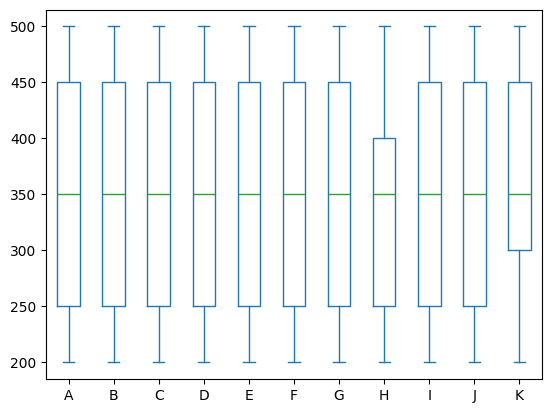

In [6]:
df_pivot = df.pivot(columns='Category', values='Numeric1')
df_pivot.plot(kind='box')

<Axes: >

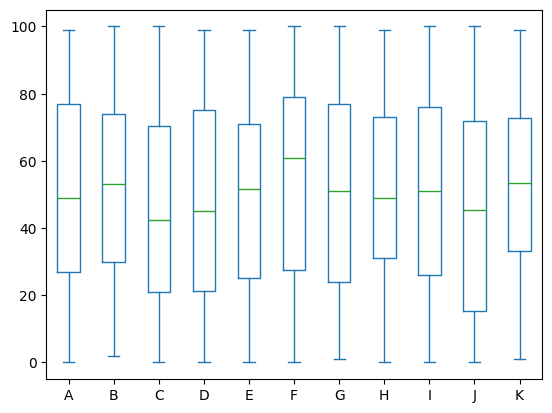

In [7]:
df_pivot2 = df.pivot(columns='Category', values='Numeric2')
df_pivot2.plot(kind='box')

#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [8]:
np.random.seed(400)
n_rows = 1000
numeric_1 = np.random.normal(loc=0, scale=1, size=n_rows)
numeric_2 = np.random.normal(loc=100, scale=20, size=n_rows)
numeric_3 = np.random.normal(loc=1000, scale=200, size=n_rows)
numeric_4 = np.random.normal(loc=-50, scale=5, size=n_rows)
categories = ["A", "B", "C", "D", "E"]
random_letters = np.random.choice(categories, size=n_rows)

for col in [numeric_1, numeric_2, numeric_3, numeric_4]:
    mask = np.random.rand(n_rows) < 0.05
    col[mask] = np.nan

mask = np.random.rand(n_rows) < 0.05
random_letters[mask] = None

df = pd.DataFrame({'numeric_1': numeric_1, 'numeric_2': numeric_2,'numeric_3': numeric_3, 'numeric_4': numeric_4, 'category': random_letters})
df

,numeric_1,numeric_2,numeric_3,numeric_4,category
0,-1.130571,82.667893,870.960599,-49.616648,B
1,0.696200,149.952021,1448.827527,NaN,E
2,-0.432293,95.381556,1208.062123,-53.561010,E
3,0.741020,113.178336,1257.316620,-55.271860,N
4,NaN,128.089392,NaN,-41.707443,E
...,...,...,...,...,...
995,1.134594,91.012745,1000.290201,-56.717625,A
996,NaN,107.804203,719.148627,NaN,E
997,0.616466,71.289795,954.467795,-50.364850,E
998,0.159027,101.845185,841.289897,-45.493213,B


In [11]:
np.random.seed(400)
cat_map = {cat: i for i, cat in enumerate(categories)}

noise = np.random.normal(0, 1, n_rows)
calculation = (
    0.3 * df['numeric_1'].fillna(0) +
    0.01 * df['numeric_2'].fillna(0) +
    0.001 * df['numeric_3'].fillna(0) -
    0.2 * df['numeric_4'].fillna(0) +
    noise
)

df['target'] = calculation > np.median(calculation)

df

,numeric_1,numeric_2,numeric_3,numeric_4,category,target
0,-1.130571,82.667893,870.960599,-49.616648,B,False
1,0.696200,149.952021,1448.827527,NaN,E,False
2,-0.432293,95.381556,1208.062123,-53.561010,E,True
3,0.741020,113.178336,1257.316620,-55.271860,N,True
4,NaN,128.089392,NaN,-41.707443,E,False
...,...,...,...,...,...,...
995,1.134594,91.012745,1000.290201,-56.717625,A,True
996,NaN,107.804203,719.148627,NaN,E,False
997,0.616466,71.289795,954.467795,-50.364850,E,True
998,0.159027,101.845185,841.289897,-45.493213,B,False


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [13]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def run_classifier(df, classifier):
    # Separate features/target
    y = df["target"].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=["target"])

    #You fill in the pipeline definition.  Make sure to:
    cat_cols = X.select_dtypes(include=["object", "category"]).columns
    num_cols = X.select_dtypes(include=["number", "bool"]).columns

    cat_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OneHotEncoder(handle_unknown="ignore"))])
    # - process categorical features (using an imputer and one hot encoder)
    
    num_pipe = Pipeline([("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())])
    # - process numeric features (using an imputer and StandardScaler)
    
    preprocessing = ColumnTransformer([("categorical", cat_pipe, cat_cols), ("numeric",  num_pipe, num_cols)])

    # Full pipeline
    pipeline = Pipeline([("preprocessing", preprocessing), ("classifier", classifier)])
    # - define your pipeline using `pipeline = ...`


# TODO: Replace with your code (fill)
    # --- 5-fold CV using F1
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)


scores = run_classifier(df, LogisticRegression(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

F1 (5-fold): mean=0.901, std=0.019
Fold scores: [0.907 0.925 0.897 0.869 0.908]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [15]:
from sklearn.ensemble import RandomForestClassifier
scores = run_classifier(df,  RandomForestClassifier(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

F1 (5-fold): mean=0.903, std=0.023
Fold scores: [0.878 0.918 0.882 0.898 0.939]


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

Both regression types work well compared to one another since their results are fairly similar, with F1 means 0.002 apart and standard deviations .04 apart. For this specific result, the Linear Regression Model probably works the best out of the two models. I think that the logistic regression is doing almost as well as the Random Forest for this data because the true relationship might be linear, which is why logistic regression works well since it gives the same analysis as a more advanced model like Random Forest.